# Matplotlib 실습 1

**[실습 유의 사항]**

https://docs.google.com/spreadsheets/d/1LufpYknSbN7179sVPreZ-hDJ7vHaZ1l64XMZeivjySQ/edit?usp=sharing

공유한 파일에 실습 현황을 공유해 주세요. 수업 진행에 도움이 됩니다.

In [270]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%config InlineBackend.figure_format = 'svg'

In [272]:
# !apt install -y fonts-nanum
# !fc-cache -fv

# applyfont = "NanumGothic"
# applyfont = "나눔고딕"
applyfont = "LG Smart UI"

import matplotlib.font_manager as fm
if not any(map(lambda ft: ft.name == applyfont, fm.fontManager.ttflist)):
    fm.fontManager.addfont("C:\/Windows\/Fonts\/Naumgotic.ttf")

plt.rc("font", family=applyfont)
plt.rc("axes", unicode_minus=False)

한글이 잘 표시되는지 아래 코드를 실행시켜서 확인해보면 좋습니다. 한글이 정상적으로 나온다면 잘 적용된 것 입니다. 

In [273]:
font_path = 'C:/Windows/Fonts/Naumgotic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)
print(fontprop)


LG Smart UI:style=normal:variant=normal:weight=normal:stretch=normal:file=C\:/Windows/Fonts/Naumgotic.ttf:size=18.0


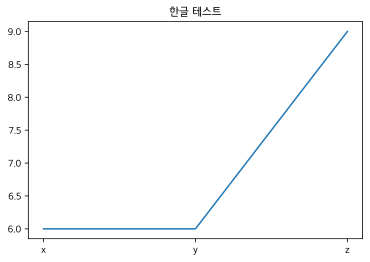

In [274]:
dat = pd.Series({'x': 6, 'y': 6, 'z':9})

plt.plot(dat.index, dat)
plt.title("한글 테스트")
plt.show()

---

**문제1 - pyplot 연습**   

pyplot의 기능들을 활용하여 집 평수에 따른 가격 그래프를 그려봅시다!

각 소문제를 풀어나가면서 그래프에 조건을 추가하게 됩니다.

이전에 구현했던 내용을 누적해 나가면서 풀어보시면 좋을 것 같습니다.


---

**문제1-1 data 준비**   

먼저 집 평수 당 가격 데이터를 준비해봅시다.

집 평수를 x라고 했을 때 가격은 다음과 같은 관계식이 성립한다고 가정합시다.

$$
f(x) = 5×\sqrt{x}-10
$$

데이터는 다음의 조건을 만족합니다.

- 데이터는 2개의 ndarray로 이루어져 있습니다.
- 첫 번째는 집의 크기 데이터, 두 번째는 해당 집의 가격이 들어있는 데이터 입니다. (같은 index의 데이터는 같은 집을 의미합니다.)
- 데이터의 개수는 총 1000 개 입니다.
- 집의 크기는 평수로 표현됩니다. (10평에서 80평 사이의 집들의 데이터만 존재합니다.)
- 집의 가격은 평수에 따라서 위의 관계식으로 계산합니다.
- 노이즈를 주기 위해서 계산된 가격 마다 '평균 : 1', '표준 편차 : 0.2'의 정규 분포를 이루는 난수를 생성하여 곱해줍니다. 

다음 풀이를 참고해서 데이터를 만들어보세요!

예시)
```
>>> house = np.random.randint(10, 81, 1000)
>>> price_org = np.sqrt(house) * 5 - 10
>>> noise = np.random.normal(1, 0.2, size=1000)
>>> price = price_org * noise
```

In [275]:
house = np.random.randint(10, 81, 1000)
price_org = np.sqrt(house) * 5 - 10
noise = np.random.normal(1, 0.2, size=1000)
price = price_org * noise


---

**문제1-2 데이터를 점으로 표현하기**   

위에서 만든 데이터를 그래프 위에 점으로 표현해볼까요?

지켜야 할 조건:
- 검은색 점으로 표현해보세요!('k.' marker를 사용하시면 됩니다.)
- 너무 진하지 않게 alpha 값을 0.3으로 설정해주세요

지키지 않아도 되는 조건:
- 현재 단계에서는 위의 조건만 만족하면 됩니다.
- 그림 크기는 각자 잘 보이시는 대로 맞춰서 조정해주시면 됩니다.
  - 슬라이드의 예시에서는 figsize=(10, 8) 옵션을 사용하였습니다.



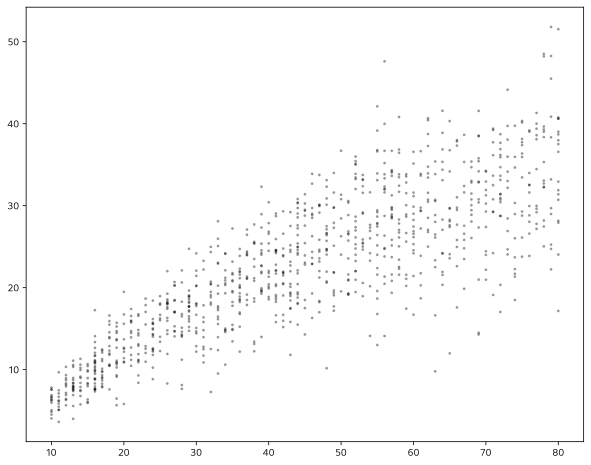

In [276]:
plt.figure(figsize=(10,8))
plt.scatter(house, price, marker='.', s=15, color='black', alpha=0.3)

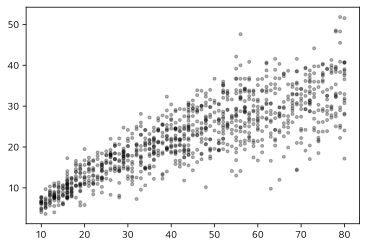

In [277]:
plt.figure(figsize=(10,8))
plt.plot(house, price, 'k.', alpha=0.3)

---

**문제1-3 가이드 함수 그리기**

데이터의 추세를 알아보기 쉽게, 데이터 사용에 사용된 관계식을 표현해 봅시다.

관계식을 선으로 그래프 위에 표현하기 위해서 2개의 ndarray를 생성합니다.
1. x축 데이터를 위해 np.arange를 사용하여 10부터 80까지의 정수를 갖는 ndarray를 생성합니다.
2. y축 데이터를 위해서 1번에서 만든 ndarray를 관계식으로 계산한 결과를 갖는 ndarray를 생성합니다.

두 array를 이용해서 그래프에 추세선을 추가해 보세요.

지켜야 할 조건:
- 선의 색은 빨간색으로 합니다.


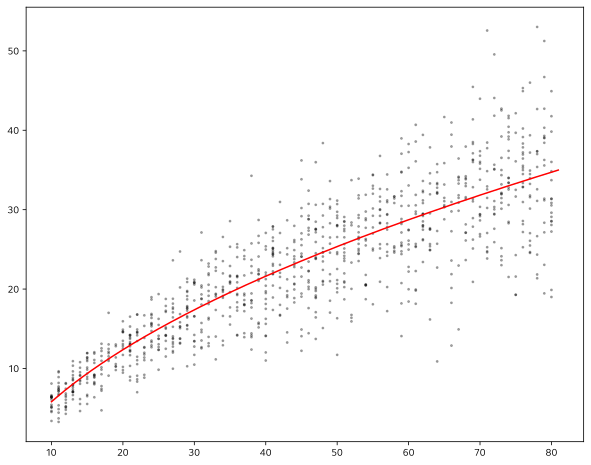

In [60]:
x_data = np.arange(10, 81, 80/1000)
y_data = np.sqrt(x_data) * 5 - 10

plt.figure(figsize=(10,8))
plt.scatter(house, price, marker='.', s=15, color='black', alpha=0.3)
plt.plot(x_data, y_data, "r")
plt.show()

---

**문제1-4 가장 저렴한 집과 가장 비싼 집**

가장 저렴한 집과 가장 비싼 집은 눈에 띌 수 있게 따로 표시해주도록 하겠습니다.

갖춰야 할 조건:
- 가장 저렴한 집은 초록색 세모로 표시하고, 가장 비싼 집은 파란색 네모로 표시합니다.


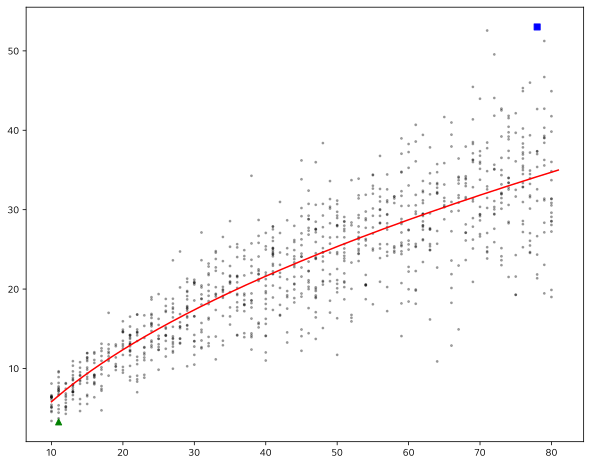

In [71]:
x_min_max = [house[np.argmin(price)], house[np.argmax(price)]]
y_min_max = [price[np.argmin(price)], price[np.argmax(price)]]

plt.figure(figsize=(10,8))
plt.scatter(house, price, marker='.', s=15, color='black', alpha=0.3)
plt.plot(x_data, y_data, "r")
plt.plot(x_min_max[0], y_min_max[0], "^g", x_min_max[1], y_min_max[1], "sb")
plt.show()

---

**문제1-5 x축**

x축을 더욱 명시적으로 보일 수 있도록 변경해봅시다.

갖춰야 할 조건:
- xtick에 'p' 단위가 함께 표현될 수 있도록 합니다.(예: 10p, 20p, ... , 80p)
- x축에 'House Size' 라는 제목을 붙여줍니다.
- 축 제목에 labelpad를 20 만큼 부여합니다.


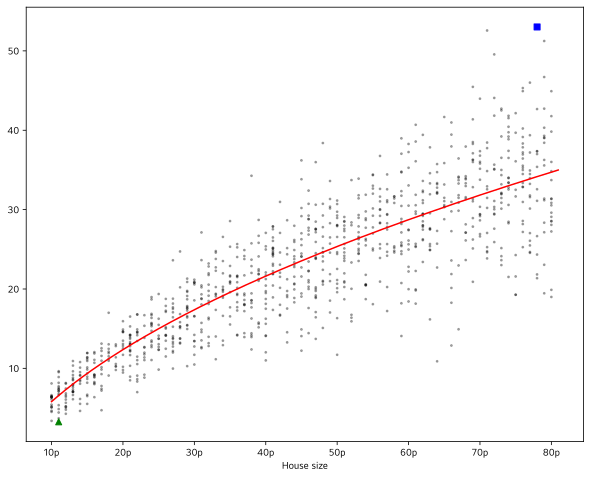

In [80]:
plt.figure(figsize=(10,8))
plt.scatter(house, price, marker='.', s=15, color='black', alpha=0.3)
plt.plot(x_data, y_data, "r")
plt.plot(x_min_max[0], y_min_max[0], "^g", x_min_max[1], y_min_max[1], "sb")
plt.xlabel('House size')

plt.xticks(np.arange(10, 81, 10), [f'{x}p' for x in np.arange(10, 81, 10)])
plt.show()

---

**문제1-6 y축과 Grid**

y축에도 'Price'라는 제목을 추가해봅시다.

그래프에 Grid도 추가해봅시다.

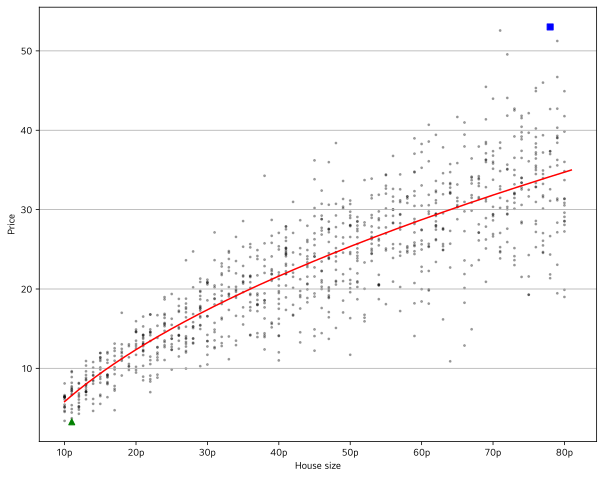

In [81]:
plt.figure(figsize=(10,8))
plt.scatter(house, price, marker='.', s=15, color='black', alpha=0.3)
plt.plot(x_data, y_data, "r")
plt.plot(x_min_max[0], y_min_max[0], "^g", x_min_max[1], y_min_max[1], "sb")
plt.xlabel('House size')
plt.ylabel('Price')

plt.xticks(np.arange(10, 81, 10), [f'{x}p' for x in np.arange(10, 81, 10)])
plt.grid(True, axis='y')
plt.show()

---

**문제1-7 그래프의 제목과 범례**

그래프에 제목과 범례를 달아봅시다.

갖춰야 할 조건:
- 제목은 'Price by House Size'로 합니다.
- 범례는, 검은 점을 'actual data'로, 빨간 선을 'estimated line' 이라고 표시합니다.
- 범례의 위치는 왼쪽 위로 합니다.


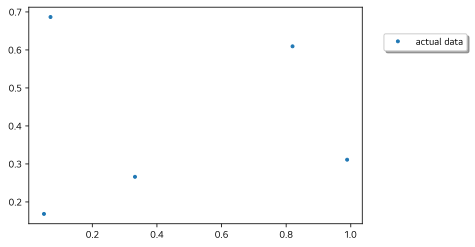

In [105]:
# # markers = '.,ov^<>1234sp*hH+xDd|_'
# # for m in markers:
# plt.plot(np.random.rand(5), np.random.rand(5), ".", label='actual data')
# plt.legend(ncol=2, bbox_to_anchor=(1.05, 0.9), shadow=True)

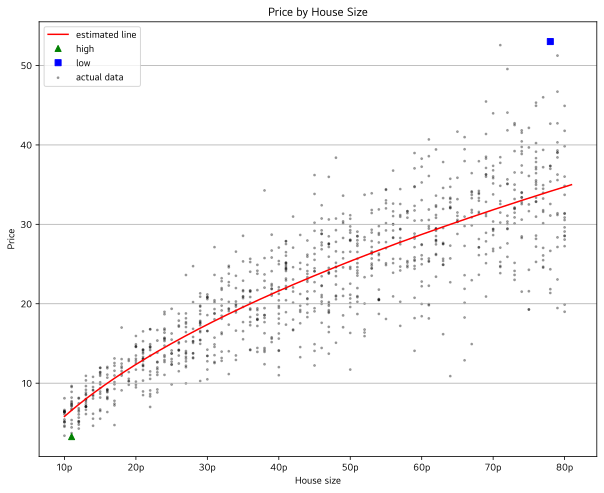

In [110]:
plt.figure(figsize=(10,8))
plt.scatter(house, price, marker='.', s=15, color='black', alpha=0.3, label="actual data")
plt.plot(x_data, y_data, "r", label="estimated line")

plt.plot(x_min_max[0], y_min_max[0], "^g", label="high")
plt.plot(x_min_max[1], y_min_max[1], "sb", label="low")
plt.legend(loc='upper left')

plt.xticks(np.arange(10, 81, 10), [f'{x}p' for x in np.arange(10, 81, 10)])
plt.grid(True, axis='y')

plt.xlabel('House size')
plt.ylabel('Price')
plt.title('Price by House Size')

plt.show()

---

**문제2 Scatter Plot**

문제 1에서 사용되었던 data를 Scatter Plot을 이용해서 새롭게 표현해봅시다.

Data들을 문제 1-2에서 배열했던 형태로 나열합니다.

지키지 않아도 되는 조건:
- 문제 1에서 pyplot을 연습하기 위해서 했던 별도의 조건들은 전부 무시하셔도 됩나다.
  - 축 제목, Grid, 범례, 등

Scatter Plot 연습을 위해서 다음의 조건을 추가해보겠습니다.
1. 점의 색을 집의 가격에 따라서 다르게 표현합니다.
2. 점의 크기를 집의 크기에 따라서 다르게 표현합니다.

Option) 점의 모양을 바꿔보셔도 좋습니다.



In [113]:

area=(30 * np.random.rand(1000))**2


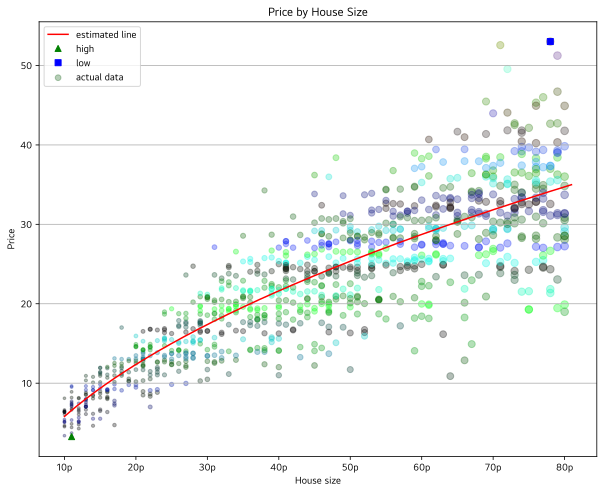

In [141]:
plt.figure(figsize=(10,8))

colors = [f"#{cc**4:06x}" for cc in price.astype(int)]
area = (house)*3
plt.scatter(house, price, marker='.', s=area, color=colors, alpha=0.3, label="actual data")
plt.plot(x_data, y_data, "r", label="estimated line")

plt.plot(x_min_max[0], y_min_max[0], "^g", label="high")
plt.plot(x_min_max[1], y_min_max[1], "sb", label="low")
plt.legend(loc='upper left')

plt.xticks(np.arange(10, 81, 10), [f'{x}p' for x in np.arange(10, 81, 10)])
plt.grid(True, axis='y')

plt.xlabel('House size')
plt.ylabel('Price')
plt.title('Price by House Size')

plt.show()

---

**문제3 Bar Plot**

문제1에서 사용했던 데이터를 이용하여 새로운 Bar Plot을 그려봅시다.

---

**문제3-1 Bar Plot(Side-by-Side Bar Chart)**

데이터를 기준선(관계식) 보다 아래에 있는 집(기준보다 싼 집)과 기준선 보다 위에 있는 집(기준보다 바싼 집)으로 분류하고자 합니다.

분류한 데이터는 구간에 따라서 집의 수를 count 합니다.

데이터의 구간은 다음과 같이 나눕니다.

- 구간 1: 10 ~ 19평
- 구간 2: 20 ~ 29평
- ... 
- 구간 7: 70 ~ 80평

따라서 다음의 3가지 array를 생성합니다.
1. x축을 위한 1에서 7까지의 값으로 이루어진 array
  - 예시: [1, 2, 3, 4, 5, 6, 7]
2. 기준보다 싼 집들을 구간에 따라 count한 결과가 들어있는 array
  - (1, 7) 크기의 array에 각 구간에 따른 값싼 집의 수가 들어있습니다.
3. 기준보다 비싼 집들을 구간에 따라 count한 결과가 들어있는 array
  - (1, 7) 크기의 array에 각 구간에 따른 비싼 집의 수가 들어있습니다.

연습을 위해서 Bar Plot에 여러가지 조건을 추가해봅시다.

1. x축은 구간을 나타냅니다.
  - xtick를 사용해서 [구간1, 구간2, ..., 구간7] 의 형태로 나타내보세요
2. y축은 각 구간과 분류에 해당하는 집의 개수를 나타냅니다.
  - y축에 표현되는 범위를 0에서 100까지로 조정해보세요 (ylim 함수를 이용해보세요)
3. 같은 구간에 해당되는 값싼 집의 data와 비싼 집의 data는 나란히 붙여서 그립니다.
  - Side-by-Side Bar Chart
4. Bar의 넓이는 0.35로 설정해주세요
5. 값싼 집의 data와 비싼 집의 data는 구분이 되도록 다른 색으로 그려보세요.
  - 값싼 집의 색은 'gray' 로 설정해주세요
  - 비싼 집의 색은 'crimson' 으로 설정해주세요
6. 범례를 추가해주세요
  - 값싼 집 그래프의 이름은 'cheap'으로 설정해주세요.
  - 비싼 집 그래프의 이름은 'expensive'로 설정해주세요.
  - 범례의 위치는 오른쪽 위로 하시면 됩니다.
7. 축 제목을 추가해보세요
  - x축의 제목은 '구간' 으로 설정해주세요.
  - y축의 제목은 '가구 수' 로 설정해주세요.
8. Grid를 추가해봅시다.
  - 가로선만 있는 Grid를 추가해봅시다. (axis='y' 옵션을 이용해보세요)
  - 라인스타일을 --으로 추가해봅시다.
  (linestyle='--' 옵션을 이용해보세요.)
 
9. 모든 글자의 크기는 15로 합니다.
  - 글씨를 표시하는 다양한 함수들에서 fontsize=15 옵션을 활용해보세요.

신경쓰지 않아도 되는 조건:
- 위에서 언급하지 않은 내용의 조건들은 편하신대로 구성하셔도 괜찮습니다.



In [250]:
# np.sqrt(house) * 5 - 10
# a = np.array([1,3,5,7,2,4,6,8])
# print(split(a, a<5))
# # print(split(house, house<20))
# print(split(house, (house>=20) & (house < 30)))
# high_array = np.zeros(7)
# print(" 20 = ", np.unique(house[house<20], return_counts=True))

bar_data_array  = np.zeros((2, 7))
for _x_ in range(7):
  x = (_x_+2)*10 
  add_v = (1 if _x_ == 6 else 0)
  # print(x)
  idx = np.where((house >= x-10) & (house < x+add_v))
  std_price = (np.sqrt(house[idx]) * 5 - 10)
  arr_idx, counts = np.unique((std_price-price[idx]) >= 0, return_counts=True)
  print(arr_idx, counts)

  bar_data_array[int(arr_idx[0])][_x_] = counts[0]
  bar_data_array[int(arr_idx[1])][_x_] = counts[1]

# print(len(house))
# np.sum(bar_data_array)


[False  True] [62 69]
[False  True] [67 74]
[False  True] [73 61]
[False  True] [76 81]
[False  True] [71 69]
[False  True] [69 62]
[False  True] [81 85]


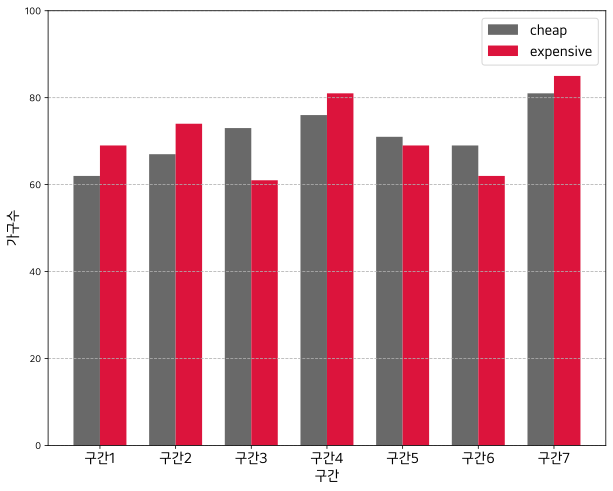

In [251]:
# print(bar_data_array)
x = np.arange(1, 8)
width = 0.35
plt.figure(figsize=(10,8))
plt.grid(True, axis='y', linestyle='--')
plt.xlabel('구간', fontsize=15)
plt.ylabel('가구수', fontsize=15)
plt.ylim(top=100)
plt.bar(x-width/2, bar_data_array[0], width, color='dimgray', label="cheap")
plt.bar(x+width/2, bar_data_array[1], width, color='crimson', label="expensive")
plt.xticks(x, [f'구간{idx}' for idx in x], fontsize=15)
plt.legend(fontsize=15)
plt.show()

---

**문제3-2 Bar Plot(Stacked Bar Chart)**

문제 3-1에서 표현했던 데이터를 이번에는 Stacked Bar Chart로 표현해봅시다.

갖춰야할 조건:
1. 문제 3-1에서 Side-by-Side 형태로 표현했던 데이터를 Sacked로 표현합니다.
  - 값싼 집에 해당되는 데이터를 아래에, 비싼 집에 해당되는 데이터를 위에 배치합니다.
2. x축은 문제 3-1과 동일한 조건을 적용합니다.
3. y축은 표현되는 범위를 0에서 200까지로 조정해보세요
4. Bar의 넓이는 0.5로 합니다.
5. Bar의 색을 다르게 칠해봅시다.
  - 값싼 집의 색은 '#d62728'로 설정해주세요
  - 비싼 집의 색은 설정하지 않으셔도 됩니다.

6. 범례, Grid, 축제목, 글씨 크기는 문제 3-1과 동일한 조건으로 적용해보세요.
  - 가로선만 있는 Grid를 추가해봅시다. (axis='y' 옵션을 이용해보세요)
  - 라인스타일을 --으로 추가해봅시다.
  (linestyle='--' 옵션을 이용해보세요.)
7. Plot에 제목을 추가해보세요
  - 제목의 내용은 '구간에 따른 가구 수' 로 합니다.
  - 제목 글씨의 크기는 18로 합니다.



갖추지 않아도 되는 조건:
- 문제 3-1과 같이 언급되지 않은 조건들은 편하신대로 구성하셔도 좋습니다.

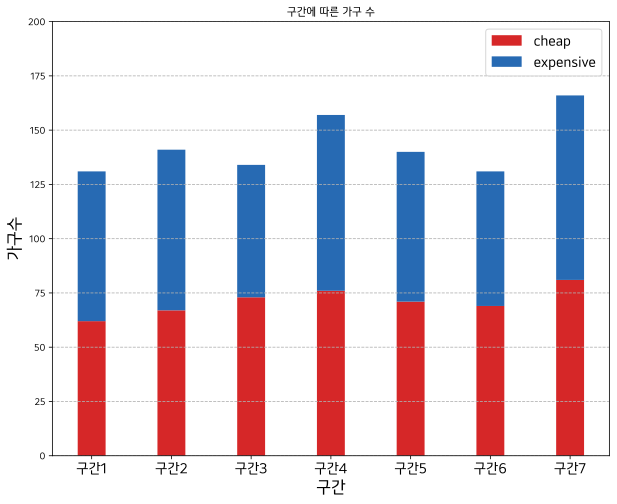

In [252]:
plt.figure(figsize=(10,8))
plt.grid(True, axis='y', linestyle='--')
plt.xlabel('구간', fontsize=18)
plt.ylabel('가구수', fontsize=18)
plt.ylim(top=200)
plt.bar(x, bar_data_array[0], width, color='#d62728', label="cheap")
plt.bar(x, bar_data_array[1], width, color='#276ab3', label="expensive", bottom=bar_data_array[0])
plt.xticks(x, [f'구간{idx}' for idx in x], fontsize=15)
plt.legend(fontsize=15)
plt.title("구간에 따른 가구 수")
plt.show()

---

**문제4 Pie Chart**

Pie Chart를 이용해서 새로운 Graph를 그려봅시다.

문제 3과 같이 7개의 구간을 나누어서 해당 구간에 포함되는 집을 count 합니다.

- 값싼 집과 비싼 집을 나눌 필요가 없습니다!

각 구간 별로 차지하는 비율을 Pie Chart를 이용해서 표현해봅시다.

먼저 index에 사용하기 위해서 다음과 같은 모양의 list를 하나 만듭니다.

```
>>> index = ['구간1', '구간2', '구간3', '구간4', '구간5', '구간6', '구간7']
```

이제 다음 조건을 만족하는 Pie Chart를 그려보세요

1. 각 구간 마다 차지하는 비율을 % 단위로 표시해보세요(소숫점 아래 한 자리까지)
사용해보세요.
2. 각 구간에 해당하는 구역마다 구간의 번호가 표시되어 있어야 합니다.
3. 가장 큰 크기를 나타내는 구간7을 강조해봅시다.
  - 구간7은 빨간색, 나머지는 회색으로 칠해서 강조해봅시다.
    - 색 칠하는 것을 쉽게 하기 위해서 Pandas의 Series를 사용해봅시다.
    - index를 위에서 만든 list(index)로 갖고, data를 전부 'gray' 로 갖는 Series를 만듭니다.
    - '구간7'에 해당하는 data를 'gray'에서 'red'로 변경합니다.
    - Pie Chart를 만들 때, color 옵션에 이 Series 객체를 넘겨주어보세요
  - Explode 옵션도 활용해 봅시다.
    - 마찬가지로 index는 위에서 만든 list로 갖고, data는 전부 0.0인 Series를 만듭니다.
    - '구간7'에 해당하는 data를 0.0에서 0.1로 변경합니다.
    - Pie Chart를 만들 때, explode 옵션에 이 Series 객체를 넘겨주어보세요.
4. Pie Char의 각 구역마다 구간이 표시될 수 있도록 해보세요.
  - Pie Chart의 label 옵션에 위에서 만들어둔 list(index)를 사용해봅시다.
5. 범례를 표시해봅시다.
  - 범례의 위치를 적절한 위치로 조정해봅시다.(loc=(0.85, 0.8) 옵션을 활용해보세요)
6. 제목도 추가해봅시다.
  - 제목은 '구간별 비율'로 표시합니다.
  - 제목 글씨의 크기는 20으로 합니다.

In [253]:
index = ['구간1', '구간2', '구간3', '구간4', '구간5', '구간6', '구간7']
print(bar_data_array[0][0]+bar_data_array[0][1])
print(np.sum(bar_data_array))

sizes = np.zeros(7)
ex = np.zeros(7)
ex[6] = 0.1
c = np.full(7, 'dimgray')
c[6] = 'red'
print(ex, c)


129.0
1000.0
[0.  0.  0.  0.  0.  0.  0.1] ['dimgray' 'dimgray' 'dimgray' 'dimgray' 'dimgray' 'dimgray' 'red']


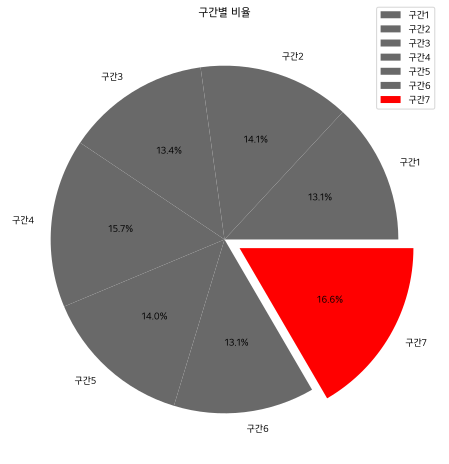

In [257]:
plt.figure(figsize=(10,8))
# plt.grid(True, axis='y', linestyle='--')
# plt.xlabel('구간', fontsize=18)
# plt.ylabel('가구수', fontsize=18)
# plt.ylim(top=200)

for idx in range(7):
    sizes[idx] = (bar_data_array[0][idx] + bar_data_array[1][idx])/10

plt.pie(sizes, explode=ex, labels=index, colors=c, autopct='%.1f%%', startangle=0)

# plt.xticks(x, [f'구간{idx}' for idx in x], fontsize=15)
plt.legend(loc=(0.85, 0.8), fontsize=10)
plt.title("구간별 비율")
plt.show()

---

**문제5 Histogram**

데이터를 집의 가격을 기준으로 10개의 구간으로 나누어 histogram으로 표현해봅시다.

갖춰야하는 조건:
- 구간의 개수는 10개로 합니다.
- 구간은 최댓값과 최소값 사이를 균등하게 나눈 것으로 합니다.
- 각 구간 마다, 해당 구간에 포함되는 집의 개수를 histogram으로 표현합니다.

갖추지 않아도 되는 조건:
- 위에서 언급하지 않은 조건들은 모두 편하신대로 하시면 됩니다.



(array([ 70., 126., 149., 171., 193., 154.,  87.,  38.,   8.,   4.]),
 array([ 3.26509119,  8.24014754, 13.21520389, 18.19026024, 23.16531658,
        28.14037293, 33.11542928, 38.09048563, 43.06554198, 48.04059833,
        53.01565468]),
 <BarContainer object of 10 artists>)

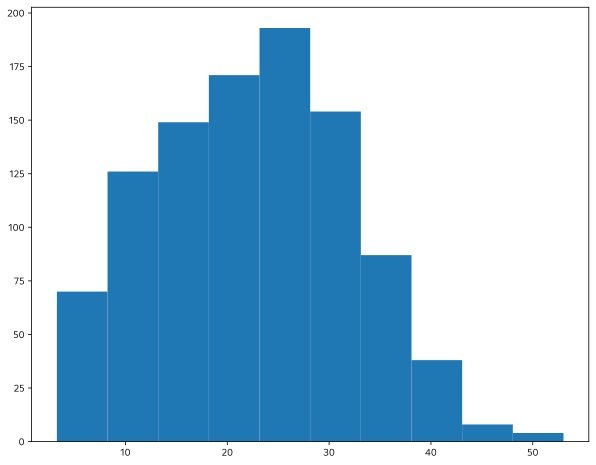

In [262]:
plt.figure(figsize=(10,8))
plt.hist(price, range=[np.min(price), np.max(price)], bins=10)

---

**문제6 BoxPlot**

집 크기에 따른 가격 데이터를 BoxPlot을 이용해서 표현해봅시다.



---

**문제6-1**

데이터중 가격 정보를 boxplot을 이용해서 표현해보세요

갖춰야하는 조건:
- Notched Box Plot을 이용해보세요

무시해도 되는 조건:
- 위의 조건을 이외의 부분은 편하신대로 하셔도 됩니다.

{'whiskers': [<matplotlib.lines.Line2D at 0x2778b6ddd30>,
 'caps': [<matplotlib.lines.Line2D at 0x2778b6dd4f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2778b6dd130>],
 'medians': [<matplotlib.lines.Line2D at 0x27788f07a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x2778b3fa340>],
 'means': []}

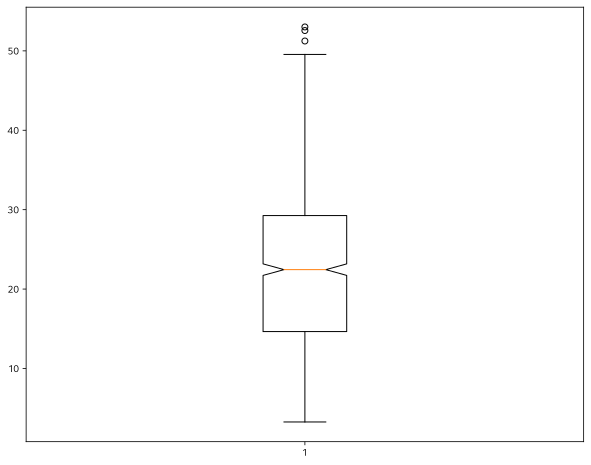

In [265]:
plt.figure(figsize=(10,8))
plt.boxplot(price, notch=True)


---

**문제6-2**

데이터중 집의 크기 정보를 boxplot을 이용해서 표현해보세요

갖춰야하는 조건:
- Notched Box Plot을 이용해보세요
- 이번에는 가로로 표현해보세요!

무시해도 되는 조건:
- 위의 조건을 이외의 부분은 편하신대로 하셔도 됩니다.

{'whiskers': [<matplotlib.lines.Line2D at 0x2778b42c9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2778b42cd90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2778b21f100>],
 'medians': [<matplotlib.lines.Line2D at 0x2778a8e0a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x2778a8e0910>],
 'means': []}

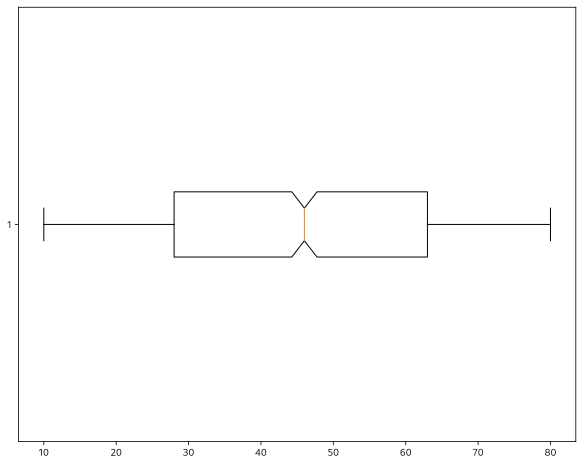

In [267]:
plt.figure(figsize=(10,8))
plt.boxplot(house, notch=True, vert=False)

---

**문제7 Subplot**

Subplot을 이용해서 문제 6번의 그래프를 새롭게 그려봅시다.

문제 6-1의 결과와 문제 6-2의 결과를 죄우로 나란히 보일 수 있도록 만들어 보세요!

- 문제 6-1의 결과를 왼편에, 문제 6-2의 결과가 오른편에 나올 수 있도록 해보세요

{'whiskers': [<matplotlib.lines.Line2D at 0x2778afa3790>,
 'caps': [<matplotlib.lines.Line2D at 0x2778afa94c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2778afeb910>],
 'medians': [<matplotlib.lines.Line2D at 0x2778afa9be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2778afa9f70>],
 'means': []}

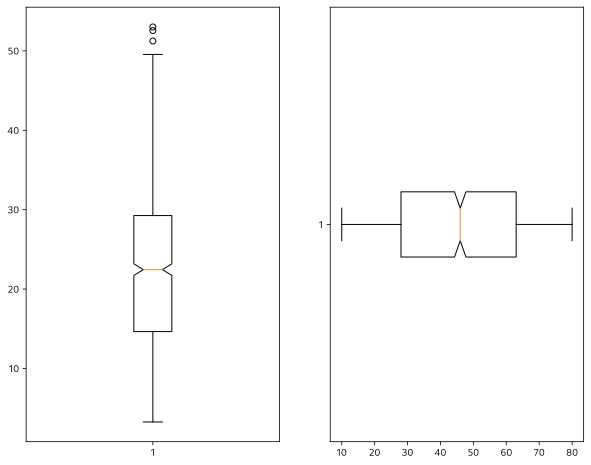

In [269]:
plt.figure(figsize=(10,8))
plt.subplot(1, 2, 1)
plt.boxplot(price, notch=True)
plt.subplot(1, 2, 2)
plt.boxplot(house, notch=True, vert=False)